# Makine Öğrenmesi 101

## Basit Tanımlar

### Örnek Senaryo: Dart ile Hedefe Atış

2 metre yüksekliğinde ve 2 metre genişliğinde bir duvarın tam ortasına bir dart tahtası asılmıştır. Dart tahtasının yarı çapı 30 cm'dir. Atışın başarılı sayılabilmesi için dartın tahtanın içine isabet etmesi yeterlidir. Duvarı kooridnat düzleminde x ve y eksenleri ile ifade edersek, dart tahtasının konumu (0, 0) noktasındadır.

### Algoritma nedir?

Algoritma, belirli bir problemi çözmek için tasarlanmış bir adımlar kümesidir. Yukarıdaki örnek senaryoya göre bir uygulama yazılmak istenirse, 2 farklı algoritma takip edilebilir:

1. Dart atışı için bir algoritma yazılabilir. Bu algoritma, dartın hedefe isabet etmesi durumunda başarılı, etmemesi durumunda başarısız olarak sonuç döndürebilir. Bu algoritmayı yazmak için yuvarlak dart tahtasının konumu ve yarı çapının bilinmesi yeterlidir. Bunun için daha önce hiç atış yapılıp yapılmaması önemli değildir. Burada temel parametre dart tahtasının çapıdır. Yapılan atışın isabet ettiği konum bilinirse, bu algoritma başarılı/başarısız sonuç döndürür.
2. Makinenin kendi kendine bu parametreyi yani yarı çapı öğrenmesi sağlanabilir. Bunun için daha önce çok sayıda atış yapılmış olmalı ve bu atışların sonuçları bilinmelidir. Bu durumda, makine öğrenmesi algoritmaları kullanılarak dart tahtasının yarı çapı öğrenilebilir ve bu model kullanılarak başarılı/başarısız sonuçlar tahmin edilebilir.

### Makine Öğrenmesi nedir?

Makine öğrenmesi, bir algoritmanın belirli bir problemi çözmek için tasarlanmış bir adımlar kümesi yerine, veriye dayalı olarak öğrenmesidir. Makine öğrenmesi algoritmaları, veri setlerini kullanarak öğrenir ve bu verilere göre tahminler yapar. Yukarıdaki örnek senaryoya göre, makine öğrenmesi algoritmaları kullanılarak dart tahtasının yarı çapı öğrenilebilir ve bu model kullanılarak başarılı/başarısız sonuçlar tahmin edilebilir.



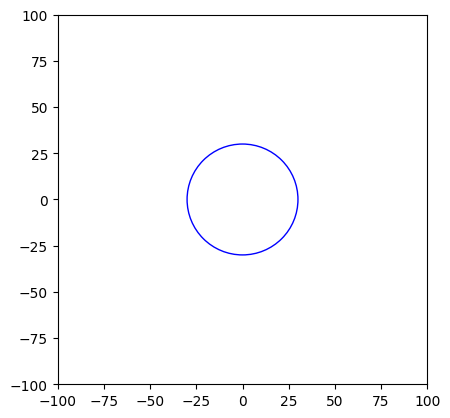

In [1]:
# draw a circle with a radius of 30 pixels and a center at (0, 0) in the window of size 200x200 pixels using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 30, color='b', fill=False)
ax.add_artist(circle)
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [96]:
DART_TAHTASININ_YARI_CAPI = 30

Bu parametreleri belirlemenin tek yolu yönetmelikten okumak değildir. Eğer elimizde yeterince veri varsa, bu parametreleri veriye bakarak da istatisliksel olarak öğrenebiliriz. İşte **Makine Öğrenmesi** denen şey tam olarak budur. Yazılacak programın şekli bu parametlerin nasıl belirleneceği netleştikten sonra tamamen aynı olacaktır.

In [97]:
import math as m
def isabet_hesapla(x, y):
    mesafe = m.sqrt(x**2 + y**2)
    return mesafe <= DART_TAHTASININ_YARI_CAPI

Öncelikle 1000 tane rastgele dart atışı yapalım ve bu atışların sonuçlarını yukarıdaki fonksiyon ile kontrol edelim. Bu atışları ve sonuçlarını bir veri seti olarak kaydedelim.

In [156]:
import pandas as pd
import numpy as np

atislar = []

for i in range(1000):
    x = np.random.randint(-100, 100)
    y = np.random.randint(-100, 100)
    isabet = isabet_hesapla(x, y)
    atislar.append({ 'x': x, 'y': y, 'isabet': isabet })

atislar_df = pd.DataFrame(atislar)
atislar_df.head()

,x,y,isabet
0,10,-7,True
1,-7,63,False
2,-96,-41,False
3,-79,53,False
4,-51,-56,False


In [157]:
isabetli_atislar = atislar_df[atislar_df['isabet'] == True]
print(f"İsabetli atış sayısı: {len(isabetli_atislar)} ve isabet oranı: {round((len(isabetli_atislar) / len(atislar)) * 100, 2)}%")

İsabetli atış sayısı: 78 ve isabet oranı: 7.8%


In [158]:
atislar_df.head(100)

,x,y,isabet
0,10,-7,True
1,-7,63,False
2,-96,-41,False
3,-79,53,False
4,-51,-56,False
...,...,...,...
95,-11,-47,False
96,70,-58,False
97,24,39,False
98,21,-34,False


### Veriyi Görseleştirme

Şimdi bu veriyi görselleştirelim. Veri setindeki her bir nokta bir dart atışını temsil eder. Başarılı atışlar yeşil, başarısız atışlar kırmızı renkte gösterilmiştir.

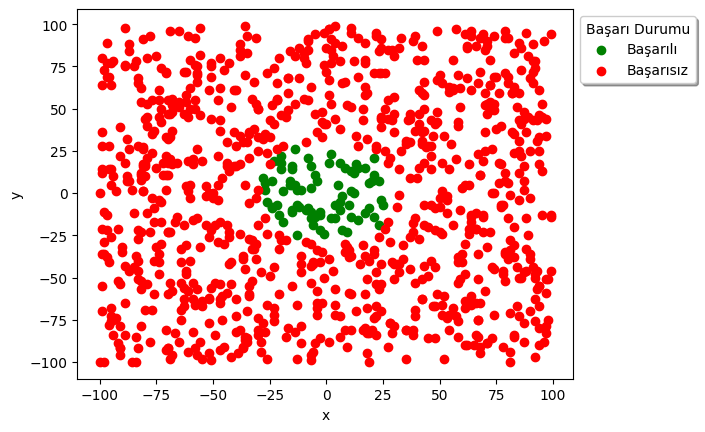

In [159]:
import matplotlib.pyplot as plt


basarili = atislar_df[atislar_df["isabet"] == True]
plt.scatter(basarili["x"], basarili["y"], color="green", label="Başarılı")

basarisiz = atislar_df[atislar_df["isabet"] == False]
plt.scatter(basarisiz["x"], basarisiz["y"], color="red", label="Başarısız")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Başarı Durumu", loc="upper left", bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.show()

### Makine Öğrenmesi

Şimdi yapılan atışların isabetli olup olmadığını tespit etmemizi sağlayan dart yarı çapı parametresini bilmediğimizi varsayalım ve bunu elimizdeki verilerden öğrenmeye çalışalım. Bunun için çok temelden başlayarak bir makine öğrenmesi modeli oluşturalım.

In [196]:
# Model için sınıf tanımlama bu sınıf içinde eğitime ve test işlemlerini yapacağız. Model ilklendirilirken öğrenme oranı ve iterasyon sayısı belirtilir.

class DartTahmin:
    def __init__(self, ogrenme_orani=0.01, tekrar_sayisi=1000):
        self.ogrenme_orani = ogrenme_orani
        self.tekrar_sayisi = tekrar_sayisi
        self.dairenin_yari_capi = round(np.random.rand() * 100) # Modelimizin tek parametresi olan dairenin yarı çapı rastgele bir değerle başlatılır.
                                                                # Rastgele bir değer yerine ön bilgimiz varsa yakın bir değer de belirtilebilir. Ya da 0 olarak başlatılabilir.
                                                                # Bu değer modelin öğrenme sürecinde güncellenecek ve gerçekte olan değerine yaklaşmaya çalışacaktır
        print(f"Modelin başlangıç yarı çapı: {self.dairenin_yari_capi}\nModelin öğrenme oranı: {self.ogrenme_orani}\nModelin öğrenme için tekrar sayısı: {self.tekrar_sayisi}")
        self.dogruluk = 0

    def ogren(self, atislar):
        # Dairenin yarı çapı başlangıçta rastgele bir değer alır. 
        # Ön bilgiler modelin daha hızlı öğrenmesini sağlar. Örneğin yarı çapın bir tam sayı olacağını biliyorsak ara değerler atlanmış olur.
        for iterasyon in range(self.tekrar_sayisi):
            true_positive = 0
            true_negative = 0
            false_positive = 0
            false_negative = 0
            for i in range(len(atislar)):
                tahmin = self.tahmin_et(atislar['x'][i], atislar['y'][i])
                gercek = atislar['isabet'][i]
                if tahmin != gercek:
                    if tahmin:
                        self.dairenin_yari_capi -= self.ogrenme_orani
                        false_positive += 1
                    else:
                        self.dairenin_yari_capi += self.ogrenme_orani
                        false_negative += 1
                else:
                    if tahmin:
                        true_positive += 1
                    else:
                        true_negative += 1

            self.dogruluk = round((true_positive + true_negative) / len(atislar), 2)
            self.dairenin_yari_capi = round(self.dairenin_yari_capi, 2)
            print(f"{iterasyon}. tur öğrenme adımı sonunda yarı çap: {self.dairenin_yari_capi} doğruluk: {self.dogruluk}")

        print(f"Son yarı çap: {self.dairenin_yari_capi} doğruluk: {self.dogruluk}")

    def tahmin_et(self, x, y):
        mesafe = m.sqrt(x**2 + y**2)
        return mesafe <= self.dairenin_yari_capi

    def test_et(self, atislar):
        dogru_tahminler = 0
        for i in range(len(atislar)):
            tahmin = self.tahmin_et(atislar['x'][i], atislar['y'][i])
            if tahmin == atislar['isabet'][i]:
                dogru_tahminler += 1

        dogruluk = round(dogru_tahminler / len(atislar), 2)
        print(f"Test doğruluğu: {round(dogruluk * 100)}%")

In [197]:
model = DartTahmin(
    ogrenme_orani=0.001,
    tekrar_sayisi=100
)


Modelin başlangıç yarı çapı: 71
Modelin öğrenme oranı: 0.001
Modelin öğrenme için tekrar sayısı: 100


In [198]:
model.ogren(atislar_df)

0. tur öğrenme adımı sonunda yarı çap: 70.69 doğruluk: 0.69
1. tur öğrenme adımı sonunda yarı çap: 70.39 doğruluk: 0.7
2. tur öğrenme adımı sonunda yarı çap: 70.09 doğruluk: 0.7
3. tur öğrenme adımı sonunda yarı çap: 69.79 doğruluk: 0.7
4. tur öğrenme adımı sonunda yarı çap: 69.5 doğruluk: 0.71
5. tur öğrenme adımı sonunda yarı çap: 69.21 doğruluk: 0.71
6. tur öğrenme adımı sonunda yarı çap: 68.92 doğruluk: 0.71
7. tur öğrenme adımı sonunda yarı çap: 68.64 doğruluk: 0.72
8. tur öğrenme adımı sonunda yarı çap: 68.36 doğruluk: 0.72
9. tur öğrenme adımı sonunda yarı çap: 68.08 doğruluk: 0.72
10. tur öğrenme adımı sonunda yarı çap: 67.8 doğruluk: 0.72
11. tur öğrenme adımı sonunda yarı çap: 67.52 doğruluk: 0.72
12. tur öğrenme adımı sonunda yarı çap: 67.24 doğruluk: 0.72
13. tur öğrenme adımı sonunda yarı çap: 66.97 doğruluk: 0.73
14. tur öğrenme adımı sonunda yarı çap: 66.7 doğruluk: 0.73
15. tur öğrenme adımı sonunda yarı çap: 66.43 doğruluk: 0.73
16. tur öğrenme adımı sonunda yarı çap: 

In [186]:
model.test_et(atislar_df)

Test doğruluğu: 94%


In [184]:
model.tahmin_et(50, 0)

False

In [ ]:
df = pd.read_csv("emails.csv")

# search for each row and columns
for i in range(len(df)):
    for j in range(len(df.columns)):
        # check if the value is string
        if type(df.iloc[i, j]) == str:
            # print the value
        print(df.iloc[i, j])